# Here are some resources to help you get started
[Data Source​ Website](https://data.cms.gov/provider-data/dataset/mj5m-pzi6)

Data Dictionary: https://data.cms.gov/provider-data/sites/default/files/data_dictionaries/physician/DOC_Data_Dictionary.pdf

[Exploratory Data Analysis Tutorials](https://www.analyticsvidhya.com/blog/2021/02/introduction-to-exploratory-data-analysis-eda/)



#Summary

####This project is designed to help scientists develop clinical trials optimally by creating a dataset that has doctors from the entire nation obtained from the CMS.gov website as well as a dataset with doctors with past clinical trial experience cleaned and merged together using pandas. Towards the end of this project I have also created a few functions to allow for easy searchability in this large dataset.  

#Visualizations
Below I have created and posted some charts showing the quantity of doctors available in this set of each specialty and as well as how many already have clinical trial experience. And finally a graph of what the dataset looks like and what information it can provide 

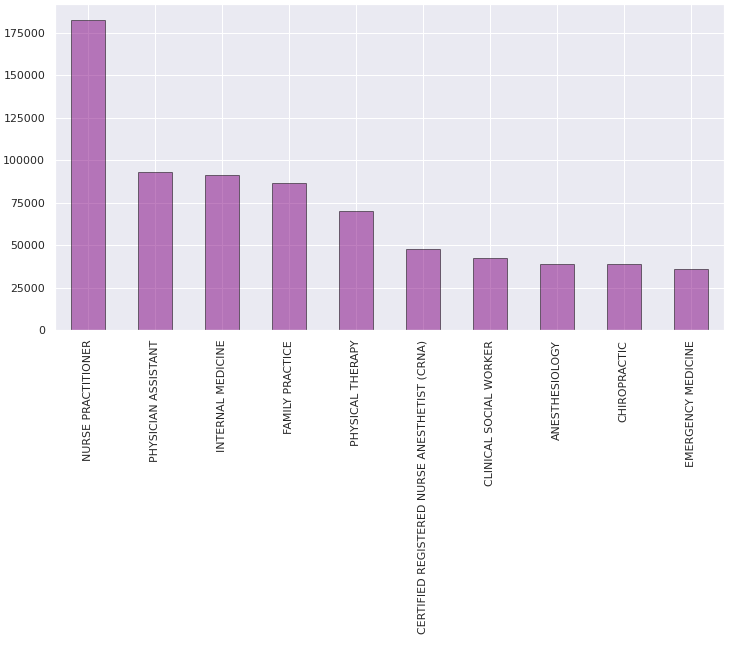

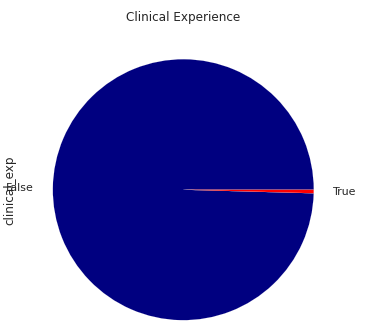

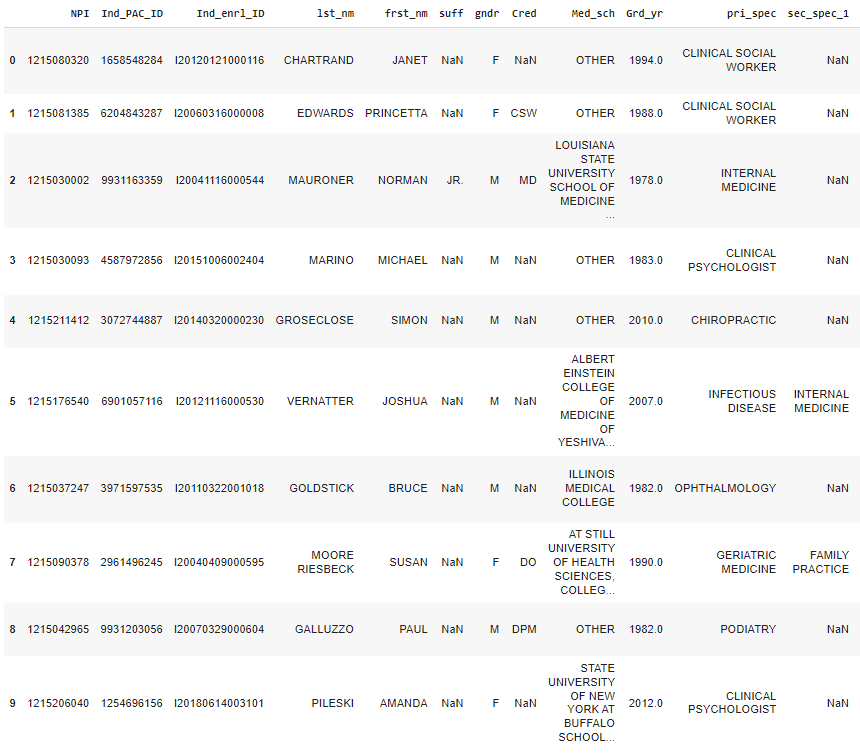

###Importing the necessary packages 

In [1]:

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (12,6)
sns.set()

#Inserting, Analyzing, and Merging New Datasets


###Here are the insights that I had throughout analyzing and cleaning these datasets
* The middle names of the doctors are either null, the full middle name, or just the initial

* The 'Ind_PAC_ID' column has varying sizes of the ID numbers

* Some people have two names in the last name column instead of just one
* The 'cred' column (credentials) has a lot of null values, and it is a pretty important column

* the assgn and grp_assgn columns show whether the doctor will 'm' for maybe or 'y' for yes will accept payment through a Medicare approved amount.

In [2]:
#Downloading the national dataset from the CMS website
! wget https://data.cms.gov/provider-data/sites/default/files/resources/69a75aa9d3dc1aed6b881725cf0ddc12_1662470068/DAC_NationalDownloadableFile.csv

--2022-09-18 15:37:03--  https://data.cms.gov/provider-data/sites/default/files/resources/69a75aa9d3dc1aed6b881725cf0ddc12_1662470068/DAC_NationalDownloadableFile.csv
Resolving data.cms.gov (data.cms.gov)... 23.206.88.226, 2a02:26f0:6b:598::28a, 2a02:26f0:6b:58a::28a
Connecting to data.cms.gov (data.cms.gov)|23.206.88.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 741851256 (707M) [text/csv]
Saving to: ‘DAC_NationalDownloadableFile.csv.2’

DAC_NationalDownloa 100%[===================>] 707.48M  34.9MB/s    in 21s     

2022-09-18 15:37:25 (33.4 MB/s) - ‘DAC_NationalDownloadableFile.csv.2’ saved [741851256/741851256]



In [3]:
df = pd.read_csv('DAC_NationalDownloadableFile.csv',encoding_errors='ignore',low_memory=False)

In [4]:
#Inputs the two new datasets into the program
facilities = pd.read_csv('facilities.csv',encoding_errors='ignore',low_memory=False)
facility_investigators = pd.read_csv('facility_investigators.csv',encoding_errors='ignore',low_memory=False)

In [5]:
facilities.shape


(2709619, 8)

In [6]:
facility_investigators.shape

(220483, 5)

####Below I take a look into the content of either dataset and how many non-null and null values there are in a given column. facilities_investigators seems to have no null values in any of its columns

In [7]:
facilities.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709619 entries, 0 to 2709618
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   id       2709619 non-null  int64 
 1   nct_id   2709619 non-null  object
 2   status   471016 non-null   object
 3   name     2489848 non-null  object
 4   city     2709513 non-null  object
 5   state    1618347 non-null  object
 6   zip      2161970 non-null  object
 7   country  2709513 non-null  object
dtypes: int64(1), object(7)
memory usage: 165.4+ MB


In [8]:
facility_investigators.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220483 entries, 0 to 220482
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           220483 non-null  int64 
 1   nct_id       220483 non-null  object
 2   facility_id  220483 non-null  int64 
 3   role         220483 non-null  object
 4   name         220483 non-null  object
dtypes: int64(2), object(3)
memory usage: 8.4+ MB


####The below quantifies the actual number of null values in each dataset without using a calculator. Also confirming the perfect record in facilities_investigators

In [9]:
facilities.isnull().sum()


id               0
nct_id           0
status     2238603
name        219771
city           106
state      1091272
zip         547649
country        106
dtype: int64

In [10]:
facility_investigators.isnull().sum()

id             0
nct_id         0
facility_id    0
role           0
name           0
dtype: int64

In [11]:
#importing a display package to make the .head commands look better
from IPython.display import display
display(facilities.head())


,id,nct_id,status,name,city,state,zip,country
0,54163635,NCT04072887,NaN,Novartis Investigative Site,Andalusia,Alabama,36420,United States
1,53628563,NCT03432260,NaN,DURECT Study Site 0001,San Diego,California,92118,United States
2,54846233,NCT01806571,NaN,Mayo Clinic in Arizona,Scottsdale,Arizona,85259,United States
3,54163636,NCT04072887,NaN,Novartis Investigative Site,Los Angeles,California,90025,United States
4,54163637,NCT04072887,NaN,Novartis Investigative Site,Westminster,California,92683,United States


In [12]:
display(facility_investigators.head())


,id,nct_id,facility_id,role,name
0,6092264,NCT05033743,53017259,Principal Investigator,"Chemen Neal, MD"
1,6092265,NCT05033743,53017259,Sub-Investigator,"David Haas, MD, MS"
2,6092266,NCT05033743,53017259,Sub-Investigator,"Peipert Jeffrey, MD, PhD"
3,6314742,NCT03505801,55091850,Principal Investigator,"Stephen Mester, MD"
4,6226691,NCT04136002,53911630,Principal Investigator,"Pankaj Kashyap, MD"


####There are commonality in columns, can use them as merging points later

####Here I am looking into further depth into the content of these columns and potentially figuring out which columns I want to remove before merging these two datasets together. 

1. The 'status' column in facilities seems to be a unimportant and unhelpful column due to the sheer number of null values 
2. The rest of the columns seem to be of potential importance for investigators looking to hire skilled doctors

In [13]:
#This gets rid of the 'status' column in df1
facilities.drop(["status"], axis = 1, inplace = True)

In [14]:
facilities.head(5)

,id,nct_id,name,city,state,zip,country
0,54163635,NCT04072887,Novartis Investigative Site,Andalusia,Alabama,36420,United States
1,53628563,NCT03432260,DURECT Study Site 0001,San Diego,California,92118,United States
2,54846233,NCT01806571,Mayo Clinic in Arizona,Scottsdale,Arizona,85259,United States
3,54163636,NCT04072887,Novartis Investigative Site,Los Angeles,California,90025,United States
4,54163637,NCT04072887,Novartis Investigative Site,Westminster,California,92683,United States


#### ^^ This is displaying the aftermath of the removal, 'status' was removed from the facilities dataset. 

In [15]:
facility_investigators.head(5)

,id,nct_id,facility_id,role,name
0,6092264,NCT05033743,53017259,Principal Investigator,"Chemen Neal, MD"
1,6092265,NCT05033743,53017259,Sub-Investigator,"David Haas, MD, MS"
2,6092266,NCT05033743,53017259,Sub-Investigator,"Peipert Jeffrey, MD, PhD"
3,6314742,NCT03505801,55091850,Principal Investigator,"Stephen Mester, MD"
4,6226691,NCT04136002,53911630,Principal Investigator,"Pankaj Kashyap, MD"


#### I am redisplaying 'facility_investigators' to compare the two sets one final time to make the decision on what type of merge I will be performing to the two datasets. 

1. Current understanding believes that I should perform an inner merge

In [16]:
#renames the column 'id' to 'facility_id' for convienance purposes when merging the two datasets. 
facilities = facilities.rename({"id":"facility_id"}, axis = 1)

In [17]:
facilities.info()
facility_investigators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709619 entries, 0 to 2709618
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   facility_id  int64 
 1   nct_id       object
 2   name         object
 3   city         object
 4   state        object
 5   zip          object
 6   country      object
dtypes: int64(1), object(6)
memory usage: 144.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220483 entries, 0 to 220482
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           220483 non-null  int64 
 1   nct_id       220483 non-null  object
 2   facility_id  220483 non-null  int64 
 3   role         220483 non-null  object
 4   name         220483 non-null  object
dtypes: int64(2), object(3)
memory usage: 8.4+ MB


###Checking and re-checking column names and null values to make sure there wasn't any information lost 

In [18]:
facilities.head(5)



,facility_id,nct_id,name,city,state,zip,country
0,54163635,NCT04072887,Novartis Investigative Site,Andalusia,Alabama,36420,United States
1,53628563,NCT03432260,DURECT Study Site 0001,San Diego,California,92118,United States
2,54846233,NCT01806571,Mayo Clinic in Arizona,Scottsdale,Arizona,85259,United States
3,54163636,NCT04072887,Novartis Investigative Site,Los Angeles,California,90025,United States
4,54163637,NCT04072887,Novartis Investigative Site,Westminster,California,92683,United States


In [19]:
facility_investigators.head(5)

,id,nct_id,facility_id,role,name
0,6092264,NCT05033743,53017259,Principal Investigator,"Chemen Neal, MD"
1,6092265,NCT05033743,53017259,Sub-Investigator,"David Haas, MD, MS"
2,6092266,NCT05033743,53017259,Sub-Investigator,"Peipert Jeffrey, MD, PhD"
3,6314742,NCT03505801,55091850,Principal Investigator,"Stephen Mester, MD"
4,6226691,NCT04136002,53911630,Principal Investigator,"Pankaj Kashyap, MD"


In [20]:
#Merging the facilities and facility_investigators datasets
clinical_trials= facilities.merge(facility_investigators, how="inner", on=["facility_id", "nct_id"])
clinical_trials.head(10)

,facility_id,nct_id,name_x,city,state,zip,country,id,role,name_y
0,54163791,NCT04056910,UPMC Hillman Cancer Center,Pittsburgh,Pennsylvania,15232,United States,6272018,Principal Investigator,"Jason J Luke, MD, FACP"
1,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,"Alice Luca, MSc"
2,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,"Jose Carvalho, MD"
3,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,"John Kingdom, MD"
4,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,"Chinaza Egbuta, PhD"
5,52531058,NCT00168493,Baker Heart Research Institute,Melbourne,Victoria,3,Australia,6049365,Principal Investigator,"David a Barton, m"
6,54163802,NCT04040673,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272023,Principal Investigator,"Alexander P Dudgeon, PhD"
7,54163802,NCT04040673,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272024,Sub-Investigator,"Catherine A Kendall, PhD"
8,54163802,NCT04040673,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272025,Sub-Investigator,"Charlie Hall, MBBS"
9,54163802,NCT04040673,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272026,Sub-Investigator,Maryam Nowghani


####Below I will check the size and shape of the merged dataset to see if the numbers make sense

In [21]:

clinical_trials.shape


(220483, 10)

In [22]:
clinical_trials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220483 entries, 0 to 220482
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   facility_id  220483 non-null  int64 
 1   nct_id       220483 non-null  object
 2   name_x       220469 non-null  object
 3   city         220483 non-null  object
 4   state        151053 non-null  object
 5   zip          193729 non-null  object
 6   country      220483 non-null  object
 7   id           220483 non-null  int64 
 8   role         220483 non-null  object
 9   name_y       220483 non-null  object
dtypes: int64(2), object(8)
memory usage: 18.5+ MB


In [23]:
display(clinical_trials.head())

,facility_id,nct_id,name_x,city,state,zip,country,id,role,name_y
0,54163791,NCT04056910,UPMC Hillman Cancer Center,Pittsburgh,Pennsylvania,15232,United States,6272018,Principal Investigator,"Jason J Luke, MD, FACP"
1,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,"Alice Luca, MSc"
2,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,"Jose Carvalho, MD"
3,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,"John Kingdom, MD"
4,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,"Chinaza Egbuta, PhD"


In [24]:
#renaming column names to clean this dataset before merging with the DAC nationwide dataset
clinical_trials = clinical_trials.rename({"name_x":"facility_name"}, axis = 1)
clinical_trials = clinical_trials.rename({"name_y":"name"},axis = 1)
clinical_trials.head()

,facility_id,nct_id,facility_name,city,state,zip,country,id,role,name
0,54163791,NCT04056910,UPMC Hillman Cancer Center,Pittsburgh,Pennsylvania,15232,United States,6272018,Principal Investigator,"Jason J Luke, MD, FACP"
1,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,"Alice Luca, MSc"
2,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,"Jose Carvalho, MD"
3,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,"John Kingdom, MD"
4,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,"Chinaza Egbuta, PhD"


In [25]:
#Checking the names of the columns in the DAC or Medicare dataset
df.columns

Index(['NPI', ' Ind_PAC_ID', ' Ind_enrl_ID', ' lst_nm', ' frst_nm', ' mid_nm',
       ' suff', ' gndr', ' Cred', ' Med_sch', ' Grd_yr', ' pri_spec',
       ' sec_spec_1', '    sec_spec_2', ' sec_spec_3', ' sec_spec_4',
       ' sec_spec_all', '    org_nm', ' org_pac_id', ' num_org_mem',
       ' adr_ln_1', ' adr_ln_2', ' ln_2_sprs', ' cty', ' st', ' zip',
       ' phn_numbr', '    hosp_afl_1', ' hosp_afl_lbn_1', ' hosp_afl_2',
       ' hosp_afl_lbn_2', ' hosp_afl_3', ' hosp_afl_lbn_3', ' hosp_afl_4',
       ' hosp_afl_lbn_4', ' hosp_afl_5', ' hosp_afl_lbn_5', ' ind_assgn',
       ' grp_assgn', ' adrs_id'],
      dtype='object')

In [26]:
#renaming columns to potentially use as merging points
df = df.rename({"cty" : "city"})
df = df.rename({"st" : "state"})
df.columns

Index(['NPI', ' Ind_PAC_ID', ' Ind_enrl_ID', ' lst_nm', ' frst_nm', ' mid_nm',
       ' suff', ' gndr', ' Cred', ' Med_sch', ' Grd_yr', ' pri_spec',
       ' sec_spec_1', '    sec_spec_2', ' sec_spec_3', ' sec_spec_4',
       ' sec_spec_all', '    org_nm', ' org_pac_id', ' num_org_mem',
       ' adr_ln_1', ' adr_ln_2', ' ln_2_sprs', ' cty', ' st', ' zip',
       ' phn_numbr', '    hosp_afl_1', ' hosp_afl_lbn_1', ' hosp_afl_2',
       ' hosp_afl_lbn_2', ' hosp_afl_3', ' hosp_afl_lbn_3', ' hosp_afl_4',
       ' hosp_afl_lbn_4', ' hosp_afl_5', ' hosp_afl_lbn_5', ' ind_assgn',
       ' grp_assgn', ' adrs_id'],
      dtype='object')

In [27]:
clinical_trials.columns


Index(['facility_id', 'nct_id', 'facility_name', 'city', 'state', 'zip',
       'country', 'id', 'role', 'name'],
      dtype='object')

In [28]:
df.head(5)


,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred,Med_sch,...,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id
0,1215080320,1658548284,I20120121000116,CHARTRAND,JANET,S,NaN,F,NaN,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,MO633688223OF4132XBLVD401
1,1215081385,6204843287,I20060316000008,EDWARDS,PRINCETTA,A,NaN,F,CSW,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NJ070603253PL1314XAVEX302
2,1215030002,9931163359,I20041116000544,MAURONER,NORMAN,L,JR.,M,MD,LOUISIANA STATE UNIVERSITY SCHOOL OF MEDICINE ...,...,NOVANT PRINCE WILLIAM MEDICAL CENTER,490144,NOVANT HEALTH UVA HEALTH HAYMARKET MEDICAL CENTER,NaN,NaN,NaN,NaN,Y,M,VA201863028WA555XXDRXX300
3,1215030093,4587972856,I20151006002404,MARINO,MICHAEL,FRANCIS,NaN,M,NaN,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NY117842554SE1305XRDXX404
4,1215211412,3072744887,I20140320000230,GROSECLOSE,SIMON,NaN,NaN,M,NaN,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,FL335446410WE2020XCIRX402


#In order to combine the clinical trials data with the original medicare data, we need seperate the name column in the clinical trials data into two separate columns. 



In [29]:
clinical_trials[['name','cred']] = clinical_trials['name'].str.split(',',n=1, expand = True)
#First we must separate the the credentials with the names 

In [30]:
clinical_trials.head(5)

,facility_id,nct_id,facility_name,city,state,zip,country,id,role,name,cred
0,54163791,NCT04056910,UPMC Hillman Cancer Center,Pittsburgh,Pennsylvania,15232,United States,6272018,Principal Investigator,Jason J Luke,"MD, FACP"
1,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,Alice Luca,MSc
2,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,Jose Carvalho,MD
3,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,John Kingdom,MD
4,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,Chinaza Egbuta,PhD


In [31]:
#This separates the first name, last name, and middle name into three separate columns, we will be removing the middle name column later
clinical_trials['frst_nm'] = clinical_trials['name'].str.split().str[0]
clinical_trials['lst_nm'] = clinical_trials.apply(lambda x: x['name'].split()
[-1].replace(x['frst_nm'], ''), axis=1)
clinical_trials['mdl_nm'] = clinical_trials.apply(lambda x: 
x['name'].replace(x['frst_nm'], 
'').replace(x['lst_nm'], ''), axis=1)

In [32]:
clinical_trials.head(5)

,facility_id,nct_id,facility_name,city,state,zip,country,id,role,name,cred,frst_nm,lst_nm,mdl_nm
0,54163791,NCT04056910,UPMC Hillman Cancer Center,Pittsburgh,Pennsylvania,15232,United States,6272018,Principal Investigator,Jason J Luke,"MD, FACP",Jason,Luke,J
1,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,Alice Luca,MSc,Alice,Luca,
2,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,Jose Carvalho,MD,Jose,Carvalho,
3,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,John Kingdom,MD,John,Kingdom,
4,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,Chinaza Egbuta,PhD,Chinaza,Egbuta,


In [33]:
#changing all the names into uppercase to match the names in the Medicare data for merging purposes
clinical_trials['frst_nm']= clinical_trials['frst_nm'].str.upper()
clinical_trials['lst_nm']= clinical_trials['lst_nm'].str.upper()
clinical_trials.head(10)

,facility_id,nct_id,facility_name,city,state,zip,country,id,role,name,cred,frst_nm,lst_nm,mdl_nm
0,54163791,NCT04056910,UPMC Hillman Cancer Center,Pittsburgh,Pennsylvania,15232,United States,6272018,Principal Investigator,Jason J Luke,"MD, FACP",JASON,LUKE,J
1,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,Alice Luca,MSc,ALICE,LUCA,
2,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,Jose Carvalho,MD,JOSE,CARVALHO,
3,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,John Kingdom,MD,JOHN,KINGDOM,
4,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,Chinaza Egbuta,PhD,CHINAZA,EGBUTA,
5,52531058,NCT00168493,Baker Heart Research Institute,Melbourne,Victoria,3,Australia,6049365,Principal Investigator,David a Barton,m,DAVID,BARTON,a
6,54163802,NCT04040673,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272023,Principal Investigator,Alexander P Dudgeon,PhD,ALEXANDER,DUDGEON,P
7,54163802,NCT04040673,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272024,Sub-Investigator,Catherine A Kendall,PhD,CATHERINE,KENDALL,A
8,54163802,NCT04040673,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272025,Sub-Investigator,Charlie Hall,MBBS,CHARLIE,HALL,
9,54163802,NCT04040673,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272026,Sub-Investigator,Maryam Nowghani,None,MARYAM,NOWGHANI,


In [34]:
#dropping the original name column as well as the middle name column
clinical_trials.drop('name',inplace = True, axis = 1)
clinical_trials.drop('mdl_nm', inplace=True,axis = 1)

In [35]:
clinical_trials.head(5)

,facility_id,nct_id,facility_name,city,state,zip,country,id,role,cred,frst_nm,lst_nm
0,54163791,NCT04056910,UPMC Hillman Cancer Center,Pittsburgh,Pennsylvania,15232,United States,6272018,Principal Investigator,"MD, FACP",JASON,LUKE
1,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,MSc,ALICE,LUCA
2,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,MD,JOSE,CARVALHO
3,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,MD,JOHN,KINGDOM
4,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,PhD,CHINAZA,EGBUTA


###Before merging I want to mark the values in this dataset with a marker to show that everyone here has clinical trial experience to make it easier to differentiate them after merging

In [36]:
#Creates clinical_exp column 
clinical_trials['clinical_exp'] = True
clinical_trials.head(10)

,facility_id,nct_id,facility_name,city,state,zip,country,id,role,cred,frst_nm,lst_nm,clinical_exp
0,54163791,NCT04056910,UPMC Hillman Cancer Center,Pittsburgh,Pennsylvania,15232,United States,6272018,Principal Investigator,"MD, FACP",JASON,LUKE,True
1,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,MSc,ALICE,LUCA,True
2,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,MD,JOSE,CARVALHO,True
3,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,MD,JOHN,KINGDOM,True
4,54163792,NCT04053478,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,PhD,CHINAZA,EGBUTA,True
5,52531058,NCT00168493,Baker Heart Research Institute,Melbourne,Victoria,3,Australia,6049365,Principal Investigator,m,DAVID,BARTON,True
6,54163802,NCT04040673,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272023,Principal Investigator,PhD,ALEXANDER,DUDGEON,True
7,54163802,NCT04040673,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272024,Sub-Investigator,PhD,CATHERINE,KENDALL,True
8,54163802,NCT04040673,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272025,Sub-Investigator,MBBS,CHARLIE,HALL,True
9,54163802,NCT04040673,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272026,Sub-Investigator,None,MARYAM,NOWGHANI,True


In [37]:
clinical_trials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220483 entries, 0 to 220482
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   facility_id    220483 non-null  int64 
 1   nct_id         220483 non-null  object
 2   facility_name  220469 non-null  object
 3   city           220483 non-null  object
 4   state          151053 non-null  object
 5   zip            193729 non-null  object
 6   country        220483 non-null  object
 7   id             220483 non-null  int64 
 8   role           220483 non-null  object
 9   cred           126586 non-null  object
 10  frst_nm        220483 non-null  object
 11  lst_nm         220483 non-null  object
 12  clinical_exp   220483 non-null  bool  
dtypes: bool(1), int64(2), object(10)
memory usage: 22.1+ MB


#Merging the clinical trial data and the medicare data together


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2401960 entries, 0 to 2401959
Data columns (total 40 columns):
 #   Column           Dtype  
---  ------           -----  
 0   NPI              int64  
 1    Ind_PAC_ID      int64  
 2    Ind_enrl_ID     object 
 3    lst_nm          object 
 4    frst_nm         object 
 5    mid_nm          object 
 6    suff            object 
 7    gndr            object 
 8    Cred            object 
 9    Med_sch         object 
 10   Grd_yr          float64
 11   pri_spec        object 
 12   sec_spec_1      object 
 13      sec_spec_2   object 
 14   sec_spec_3      object 
 15   sec_spec_4      object 
 16   sec_spec_all    object 
 17      org_nm       object 
 18   org_pac_id      float64
 19   num_org_mem     float64
 20   adr_ln_1        object 
 21   adr_ln_2        object 
 22   ln_2_sprs       object 
 23   cty             object 
 24   st              object 
 25   zip             object 
 26   phn_numbr       float64
 27      hosp_afl

In [39]:
#cleaning to make sure there are no errors
clinical_trials.drop_duplicates('frst_nm',inplace= True ,keep='first')

In [40]:
clinical_trials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25816 entries, 0 to 220459
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   facility_id    25816 non-null  int64 
 1   nct_id         25816 non-null  object
 2   facility_name  25808 non-null  object
 3   city           25816 non-null  object
 4   state          14534 non-null  object
 5   zip            20638 non-null  object
 6   country        25816 non-null  object
 7   id             25816 non-null  int64 
 8   role           25816 non-null  object
 9   cred           18906 non-null  object
 10  frst_nm        25816 non-null  object
 11  lst_nm         25816 non-null  object
 12  clinical_exp   25816 non-null  bool  
dtypes: bool(1), int64(2), object(10)
memory usage: 2.6+ MB


In [41]:
#stripping the empty spaces in column names because they affect the merging process
df.columns = df.columns.str.strip()
print(df.columns)

Index(['NPI', 'Ind_PAC_ID', 'Ind_enrl_ID', 'lst_nm', 'frst_nm', 'mid_nm',
       'suff', 'gndr', 'Cred', 'Med_sch', 'Grd_yr', 'pri_spec', 'sec_spec_1',
       'sec_spec_2', 'sec_spec_3', 'sec_spec_4', 'sec_spec_all', 'org_nm',
       'org_pac_id', 'num_org_mem', 'adr_ln_1', 'adr_ln_2', 'ln_2_sprs', 'cty',
       'st', 'zip', 'phn_numbr', 'hosp_afl_1', 'hosp_afl_lbn_1', 'hosp_afl_2',
       'hosp_afl_lbn_2', 'hosp_afl_3', 'hosp_afl_lbn_3', 'hosp_afl_4',
       'hosp_afl_lbn_4', 'hosp_afl_5', 'hosp_afl_lbn_5', 'ind_assgn',
       'grp_assgn', 'adrs_id'],
      dtype='object')


In [42]:
#Matching the column names of both datasets
#clinical_trials.rename(columns= {'cred':'Cred', inplace = True)
clinical_trials.rename(columns={'city':'cty', 'state':'st'},inplace = True)

In [43]:
clinical_trials.columns

Index(['facility_id', 'nct_id', 'facility_name', 'cty', 'st', 'zip', 'country',
       'id', 'role', 'cred', 'frst_nm', 'lst_nm', 'clinical_exp'],
      dtype='object')

In [44]:
df.columns

Index(['NPI', 'Ind_PAC_ID', 'Ind_enrl_ID', 'lst_nm', 'frst_nm', 'mid_nm',
       'suff', 'gndr', 'Cred', 'Med_sch', 'Grd_yr', 'pri_spec', 'sec_spec_1',
       'sec_spec_2', 'sec_spec_3', 'sec_spec_4', 'sec_spec_all', 'org_nm',
       'org_pac_id', 'num_org_mem', 'adr_ln_1', 'adr_ln_2', 'ln_2_sprs', 'cty',
       'st', 'zip', 'phn_numbr', 'hosp_afl_1', 'hosp_afl_lbn_1', 'hosp_afl_2',
       'hosp_afl_lbn_2', 'hosp_afl_3', 'hosp_afl_lbn_3', 'hosp_afl_4',
       'hosp_afl_lbn_4', 'hosp_afl_5', 'hosp_afl_lbn_5', 'ind_assgn',
       'grp_assgn', 'adrs_id'],
      dtype='object')

In [45]:
#Merging the datasets
Medicare_investigators = df.merge(clinical_trials, how='left', on = ['frst_nm','lst_nm'])

In [46]:
Medicare_investigators.head()

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred,Med_sch,...,nct_id,facility_name,cty_y,st_y,zip_y,country,id,role,cred,clinical_exp
0,1215080320,1658548284,I20120121000116,CHARTRAND,JANET,S,NaN,F,NaN,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1215081385,6204843287,I20060316000008,EDWARDS,PRINCETTA,A,NaN,F,CSW,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1215030002,9931163359,I20041116000544,MAURONER,NORMAN,L,JR.,M,MD,LOUISIANA STATE UNIVERSITY SCHOOL OF MEDICINE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1215030093,4587972856,I20151006002404,MARINO,MICHAEL,FRANCIS,NaN,M,NaN,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1215211412,3072744887,I20140320000230,GROSECLOSE,SIMON,NaN,NaN,M,NaN,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#removing duplicate entries/cleaning the final dataset
Medicare_investigators.drop_duplicates('NPI',inplace= True ,keep='first')

In [48]:
#making sure merged dataset has the correct amount of rows
Medicare_investigators.shape

(1219799, 51)

In [49]:
Medicare_investigators.columns

Index(['NPI', 'Ind_PAC_ID', 'Ind_enrl_ID', 'lst_nm', 'frst_nm', 'mid_nm',
       'suff', 'gndr', 'Cred', 'Med_sch', 'Grd_yr', 'pri_spec', 'sec_spec_1',
       'sec_spec_2', 'sec_spec_3', 'sec_spec_4', 'sec_spec_all', 'org_nm',
       'org_pac_id', 'num_org_mem', 'adr_ln_1', 'adr_ln_2', 'ln_2_sprs',
       'cty_x', 'st_x', 'zip_x', 'phn_numbr', 'hosp_afl_1', 'hosp_afl_lbn_1',
       'hosp_afl_2', 'hosp_afl_lbn_2', 'hosp_afl_3', 'hosp_afl_lbn_3',
       'hosp_afl_4', 'hosp_afl_lbn_4', 'hosp_afl_5', 'hosp_afl_lbn_5',
       'ind_assgn', 'grp_assgn', 'adrs_id', 'facility_id', 'nct_id',
       'facility_name', 'cty_y', 'st_y', 'zip_y', 'country', 'id', 'role',
       'cred', 'clinical_exp'],
      dtype='object')

In [50]:
Medicare_investigators.drop('mid_nm', inplace=True,axis = 1)

In [51]:
Medicare_investigators.columns
#there are duplicate city and state columns so i drop them 

Index(['NPI', 'Ind_PAC_ID', 'Ind_enrl_ID', 'lst_nm', 'frst_nm', 'suff', 'gndr',
       'Cred', 'Med_sch', 'Grd_yr', 'pri_spec', 'sec_spec_1', 'sec_spec_2',
       'sec_spec_3', 'sec_spec_4', 'sec_spec_all', 'org_nm', 'org_pac_id',
       'num_org_mem', 'adr_ln_1', 'adr_ln_2', 'ln_2_sprs', 'cty_x', 'st_x',
       'zip_x', 'phn_numbr', 'hosp_afl_1', 'hosp_afl_lbn_1', 'hosp_afl_2',
       'hosp_afl_lbn_2', 'hosp_afl_3', 'hosp_afl_lbn_3', 'hosp_afl_4',
       'hosp_afl_lbn_4', 'hosp_afl_5', 'hosp_afl_lbn_5', 'ind_assgn',
       'grp_assgn', 'adrs_id', 'facility_id', 'nct_id', 'facility_name',
       'cty_y', 'st_y', 'zip_y', 'country', 'id', 'role', 'cred',
       'clinical_exp'],
      dtype='object')

In [52]:
#Dropping the duplicate city, state, zip, and cred columns
Medicare_investigators.drop(['cty_y'], axis =1, inplace = True)
Medicare_investigators.drop(['st_y'], axis =1, inplace = True)
Medicare_investigators.drop(['zip_y'], axis =1, inplace = True)
#Medicare_investigators.drop(['Cred_y'], axis =1, inplace = True)

Medicare_investigators.rename(columns= {'st_x':'st', 'zip_x':'zip', 'cty_x':'cty', 'clinical_exp_x':'clinical_exp','Cred_x':'Cred'}, inplace = True)


#Functions


####The first function is to find a doctor based on his specialty and city 

In [53]:
def find_doctors(city,specialty):
  doctors_based_on_city = Medicare_investigators[(Medicare_investigators['cty']==city) & (Medicare_investigators['pri_spec']==specialty)]
  return doctors_based_on_city

In [54]:
pd.set_option('display.max_columns', None)
find_doctors('NEW YORK', 'OPTOMETRY')

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,suff,gndr,Cred,Med_sch,Grd_yr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,org_nm,org_pac_id,num_org_mem,adr_ln_1,adr_ln_2,ln_2_sprs,cty,st,zip,phn_numbr,hosp_afl_1,hosp_afl_lbn_1,hosp_afl_2,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id,facility_id,nct_id,facility_name,country,id,role,cred,clinical_exp
9881,1154468650,5698904001,I20140730001732,RUVIO,DANIEL,NaN,M,NaN,ILLINOIS COLLEGE OF OPTOMETRY AT CHICAGO,1979.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249 E 86TH ST,NaN,NaN,NEW YORK,NY,100283115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,NY100283115NE249XXSTXX400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11207,1144375007,5496842221,I20100806000023,KAVNER,RICHARD,NaN,M,NaN,OTHER,1959.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245 E 54TH ST,NaN,NaN,NEW YORK,NY,100224707,2.127527e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NY100224707NE245XXSTXX400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15157,1124107685,2466587472,I20100428000328,NACHUM,JACOB,NaN,M,NaN,STATE UNIVERSITY OF NEW YORK - STATE COLLEGE O...,1983.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 BROADWAY,SUITE 908,NaN,NEW YORK,NY,100041837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NY100041837NE26XXXBROA201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15838,1114950094,4183768450,I20100224000701,KANTROWICH,PAUL,NaN,M,NaN,OTHER,1974.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405 LEXINGTON AVE,NaN,NaN,NEW YORK,NY,101740002,2.126872e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NY101740002NE405XXAVEX300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16703,1114233194,9133301062,I20120703000485,RANA,TEJAL,NaN,F,NaN,PENNSYLVANIA COLLEGE OF OPTOMETRY,2010.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77 PARK AVE,SUITE 1 C,NaN,NEW YORK,NY,100162556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NY100162556NE77XXXAVEX304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358581,1710392808,42439507,I20140915002036,CUMELLA,NICOLE,NaN,F,NaN,STATE UNIVERSITY OF NEW YORK - STATE COLLEGE O...,2014.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,TOWN OPTICAL INC,9.830088e+09,4.0,551 5TH AVE,FL 2,NaN,NEW YORK,NY,101760001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,NY101760001NE551XXAVEX301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2358583,1780609735,143249938,I20051207000678,COHEN,ROY,NaN,M,OD,STATE UNIVERSITY OF NEW YORK - STATE COLLEGE O...,1983.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,TOWN OPTICAL INC,9.830088e+09,4.0,551 5TH AVE,FL 2,NaN,NEW YORK,NY,101760001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,NY101760001NE551XXAVEX301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2358585,1962875542,5092004044,I20160516001244,SHAH,JULIE,NaN,F,NaN,OTHER,2015.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,TOWN OPTICAL INC,9.830088e+09,4.0,551 5TH AVE,NaN,NaN,NEW YORK,NY,101760001,2.127194e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,NY101760001NE551XXAVEX300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2396644,1356470900,8325119472,I20080617000246,RESNICK,SUSAN,NaN,F,NaN,STATE UNIVERSITY OF NEW YORK - STATE COLLEGE O...,1983.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,"DRS FARKAS, KASSALOW, RESNICK AND ASSOCIATES PC",9.931278e+09,3.0,30 E 60TH ST,RM 201,NaN,NEW YORK,NY,100227109,2.123555e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,NY100227109NE30XXXSTXX402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####The second function is to find a doctor with past clinical experience

In [55]:
def doctors_with_experience(clinical_experience):
  doctors_exp = Medicare_investigators[(Medicare_investigators['clinical_exp']== clinical_experience)]
  return doctors_exp

In [56]:
doctors_with_experience(True)

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,suff,gndr,Cred,Med_sch,Grd_yr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,org_nm,org_pac_id,num_org_mem,adr_ln_1,adr_ln_2,ln_2_sprs,cty,st,zip,phn_numbr,hosp_afl_1,hosp_afl_lbn_1,hosp_afl_2,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id,facility_id,nct_id,facility_name,country,id,role,cred,clinical_exp
441,1215124425,2365493533,I20100317001048,MILLER,WESTON,NaN,M,NaN,LOUISIANA STATE UNIVERSITY SCHOOL OF MEDICINE ...,1978.0,GENERAL SURGERY,VASCULAR SURGERY,NaN,NaN,NaN,VASCULAR SURGERY,NaN,NaN,NaN,2620 N DR,NaN,NaN,ABBEVILLE,LA,705104043,3.378982e+09,190034.0,ABBEVILLE GENERAL HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,LA705104043AB2620XDRXX300,53009800.0,NCT01666080,"Masonic Cancer Center, University of Minnesota",United States,6091365.0,Principal Investigator,M.D.,True
2546,1194913681,6507911351,I20160902000598,HUSSAIN,RUBABA,NaN,F,NaN,OTHER,2004.0,FAMILY PRACTICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3750 B 3RD AVE,NaN,NaN,BRONX,NY,104562102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NY104562102BR3750XAVEX400,55119987.0,NCT05026866,Prime Global Research,United States,6322927.0,Principal Investigator,None,True
2743,1194916882,4082708110,I20070920000560,MARTINEZ,JESUS,NaN,M,NaN,OTHER,1993.0,NEUROLOGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6853 FOX HORSE CV W,NaN,NaN,MEMPHIS,TN,381417335,NaN,440152.0,REGIONAL ONE HEALTH,440048,BAPTIST MEMORIAL HOSPITAL,440049,METHODIST HOSPITALS OF MEMPHIS,NaN,NaN,NaN,NaN,Y,M,TN381417335ME6853XWXXX500,53092521.0,NCT01883596,Sinaloa Pediatric Hospital,Mexico,6099159.0,Principal Investigator,MD,True
3237,1194737916,7214958784,I20051212000767,NGUYEN,TUAN,NaN,M,OD,SOUTHERN CALIFORNIA COLLEGE OF OPTOMETRY,2004.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,929 NE 181ST AVE,NaN,NaN,PORTLAND,OR,972306757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,OR972306757PO929XXAVEX400,53237297.0,NCT04980482,"Research and Education, Inc.",United States,6117669.0,Principal Investigator,None,True
3693,1194068916,5799059275,I20180817002656,PATEL,ANUP,NaN,M,NaN,NEW YORK COLLEGE OF OSTEO MEDICINE OF NEW YORK...,2013.0,PHYSICAL MEDICINE AND REHABILITATION,PAIN MANAGEMENT,NaN,NaN,NaN,PAIN MANAGEMENT,NaN,NaN,NaN,1692 OAK TREE RD,NaN,NaN,EDISON,NJ,088202853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NJ088202853ED1692XRDXX400,53733659.0,NCT03326076,Saint Barnabus Medical Center,United States,6199452.0,Principal Investigator,MD,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399561,1376715755,345386363,I20110912000402,SIMMONS,JON,NaN,M,NaN,OTHER,2004.0,GENERAL SURGERY,CRITICAL CARE (INTENSIVISTS),NaN,NaN,NaN,CRITICAL CARE (INTENSIVISTS),USA HEALTH PHYSICIAN BILLING SERVICES LLC,9.931437e+09,263.0,575 STANTON RD,NaN,NaN,MOBILE,AL,366172344,2.514717e+09,10087.0,USA HEALTH UNIVERSITY HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,AL366172344MO575XXRDXX300,53080564.0,NCT01812941,University of South Alabama Medical Center,United States,6098141.0,Principal Investigator,MD,True
2401591,1801061908,7315110962,I20150926000088,GOMBERA,MUFADDAL,NaN,M,NaN,BAYLOR COLLEGE OF MEDICINE,2008.0,ORTHOPEDIC SURGERY,SPORTS MEDICINE,NaN,NaN,NaN,SPORTS MEDICINE,"ORTHOLONESTAR, PLLC",9.931529e+09,318.0,7401 MAIN ST,NaN,NaN,HOUSTON,TX,770304509,7.137992e+09,450804.0,TEXAS ORTHOPEDIC HOSPITAL,450610,MEMORIAL HERMANN MEMORIAL CITY HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,TX770304509HO7401XSTXX300,53726428.0,NCT03379324,Texas Orthopedic Hospital,United States,6198629.0,Sub-Investigator,MD,True
2401643,1891913034,5991892242,I20071102000154,TRAN,THAI,NaN,M,NaN,OTHER,2006.0,PHYSICIAN ASSISTANT,NaN,NaN,NaN,NaN,NaN,"ORTHOLONESTAR, PLLC",9.931529e+09,318.0,2635 W BAKER RD,NaN,NaN,BAYTOWN,TX,775212206,2.813379e+09,450775.0,KINGWOOD MEDICAL CENTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,T

####The third function is to find a doctor under a specific zipcode and specialty

In [57]:
def specific_zip(specialty, zipcode):
  doctor_zip = Medicare_investigators[(Medicare_investigators['zip']== zipcode) & (Medicare_investigators['pri_spec']==specialty)]
  return doctor_zip

In [58]:
specific_zip('OPTOMETRY', '100283115')

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,suff,gndr,Cred,Med_sch,Grd_yr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,org_nm,org_pac_id,num_org_mem,adr_ln_1,adr_ln_2,ln_2_sprs,cty,st,zip,phn_numbr,hosp_afl_1,hosp_afl_lbn_1,hosp_afl_2,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id,facility_id,nct_id,facility_name,country,id,role,cred,clinical_exp
9881,1154468650,5698904001,I20140730001732,RUVIO,DANIEL,NaN,M,NaN,ILLINOIS COLLEGE OF OPTOMETRY AT CHICAGO,1979.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249 E 86TH ST,NaN,NaN,NEW YORK,NY,100283115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,NY100283115NE249XXSTXX400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####The final function is to list the doctors that will or will not accept medicare as a form of payment

In [59]:
def take_medicare(accept_medicare):
  doctor_medicare = Medicare_investigators[(Medicare_investigators['grp_assgn'] == accept_medicare)]
  return doctor_medicare
# 'Y' for yes 'M' for maybe 'N' for no 

In [60]:
take_medicare('Y')

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,suff,gndr,Cred,Med_sch,Grd_yr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,org_nm,org_pac_id,num_org_mem,adr_ln_1,adr_ln_2,ln_2_sprs,cty,st,zip,phn_numbr,hosp_afl_1,hosp_afl_lbn_1,hosp_afl_2,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id,facility_id,nct_id,facility_name,country,id,role,cred,clinical_exp
161655,1073807632,8527246693,I20110621000386,WOLUGBOMS,NELLY,NaN,F,NaN,OTHER,2010.0,NURSE PRACTITIONER,NaN,NaN,NaN,NaN,NaN,"UNITED NEIGHBORHOOD HEALTH SERVICES, INC",4.210009e+07,12.0,601 W DUE W AVE,NaN,NaN,MADISON,TN,371154423,6.152273e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,TN371154423MA601XXAVEX500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161656,1083995617,9739352972,I20111103000016,RIVERA,SANDRA,NaN,F,NaN,OTHER,2008.0,NURSE PRACTITIONER,NaN,NaN,NaN,NaN,NaN,"UNITED NEIGHBORHOOD HEALTH SERVICES, INC",4.210009e+07,12.0,617 SO 8TH ST,NaN,NaN,NASHVILLE,TN,372063819,6.152273e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,TN372063819NA617XXSTXX400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161657,1164850020,7719109826,I20210105000337,HASSEN,LAURA,NaN,F,NaN,VANDERBILT UNIVERSITY SCHOOL OF MEDICINE,2013.0,NURSE PRACTITIONER,NaN,NaN,NaN,NaN,NaN,"UNITED NEIGHBORHOOD HEALTH SERVICES, INC",4.210009e+07,12.0,2195 NOLENSVILLE PIKE,NaN,NaN,NASHVILLE,TN,372112094,6.152273e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,TN372112094NA2195XPIKE300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161660,1235374117,3274893797,I20180201000918,BENNING,KENNETH,NaN,M,NaN,OTHER,2016.0,NURSE PRACTITIONER,NaN,NaN,NaN,NaN,NaN,"UNITED NEIGHBORHOOD HEALTH SERVICES, INC",4.210009e+07,12.0,617 SO 8TH ST,NaN,NaN,NASHVILLE,TN,372063819,6.152273e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,TN372063819NA617XXSTXX400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161661,1346495157,6406031152,I20141113001575,PRISCO,MARY,NaN,F,NaN,OTHER,2008.0,NURSE PRACTITIONER,NaN,NaN,NaN,NaN,NaN,"UNITED NEIGHBORHOOD HEALTH SERVICES, INC",4.210009e+07,12.0,601 W DUE W AVE,NaN,NaN,MADISON,TN,371154423,6.152273e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,TN371154423MA601XXAVEX500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401951,1386772408,6305230913,I20220224002105,CHAFFIN,TAMARA,NaN,F,NaN,OTHER,2017.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,EMPOWER TCT LLC,9.931597e+09,2.0,330 JAMES WAY,SUITE 180,NaN,PISMO BEACH,CA,934492891,8.052663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,CA934492891PI330XXWAYX301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2401952,1619115060,8921422338,I20200717002367,TRAGA,LARISA,NaN,F,NaN,OTHER,2003.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,EMPOWER TCT LLC,9.931597e+09,2.0,330 JAMES WAY,SUITE 180,NaN,PISMO BEACH,CA,934492891,8.052663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,CA934492891PI330XXWAYX301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2401955,1568088722,5193140739,I20200730000687,CHILDERS,GISELLE,NaN,F,NaN,UNIVERSITY ALABAMA BIRMINGHAM - SCHOOL OF OPT...,2020.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,"WIREGRASS EYE CARE OF OZARK, PC",9.931598e+09,2.0,231 E BROAD ST,NaN,NaN,OZARK,AL,363601507,3.058031e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,AL363601507OZ231XXSTXX400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2401958,1952394777,6901837848,I20050830000724,SNEAG,GARY,NaN,M,OD,PENNSYLVANIA COLLEGE OF OPTOMETRY,1993.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,M LANGFORD OD OPTOMETRIC CORPORATION,9.931600e+09,3.0,4310 GENESEE AVE,SUITE 101,NaN,SAN DIEGO,CA,921174936,8.585605e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,CA921174936SA4310XAVEX302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Plots

####This bar graph shows the ratio between male and female clinicians in the dataset

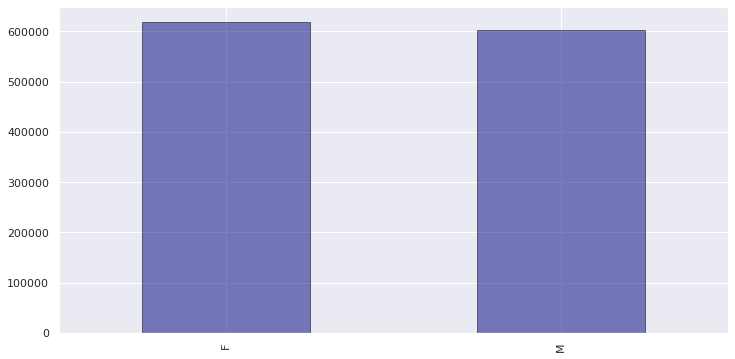

In [61]:
from pandas._libs.hashtable import value_count
Medicare_investigators.gndr.value_counts().plot(kind = 'bar',color = 'navy', alpha = 0.5, edgecolor = 'black')

####This bar graph was shown in the beginning, showing which specific specialties are present as well as their ratio

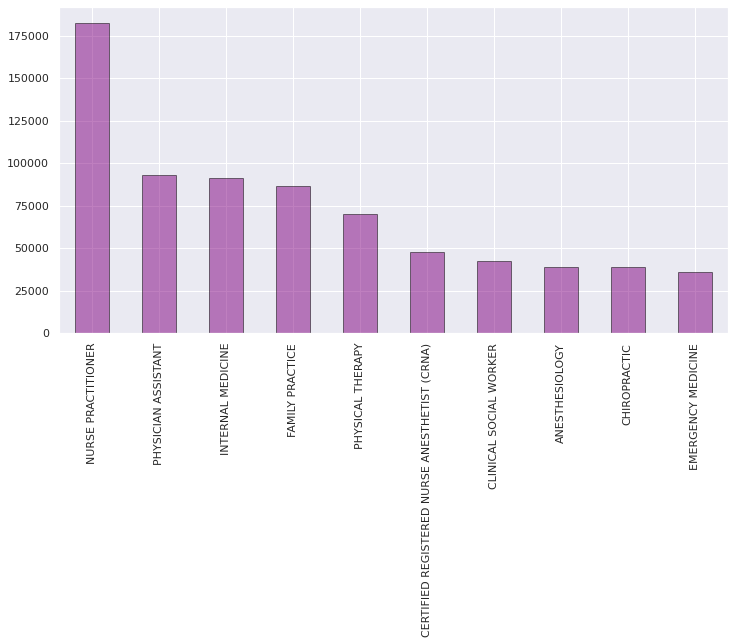

In [62]:
Medicare_investigators.pri_spec.value_counts()[:10].plot(kind = 'bar',color = 'purple', alpha = 0.5, edgecolor = 'black')



#### Pie graph shows the amount of clinicians with trial experience compared to the amount with none

In [63]:
Medicare_investigators["clinical_exp"].fillna(False, inplace = True)

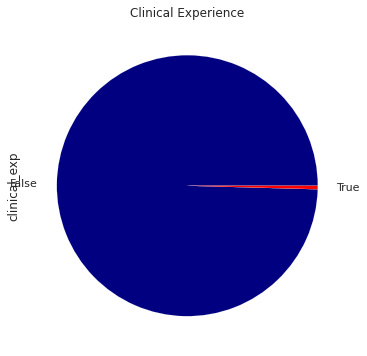

In [64]:
colors = ['#000080', '#FF0000']
Medicare_investigators.clinical_exp.value_counts().plot(kind = 'pie',title = "Clinical Experience", labeldistance=1.15, wedgeprops = { 'linewidth' : 0.1, 'edgecolor' : 'white' }, colors= colors);